In [224]:
import pandas as pd
from scipy.io import loadmat
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

In [248]:
class ActiveModel:
    def __init__(self, N, k, path):
        train, test, unlabeled = path['train'], path['test'], path['unlabeled']
        self.accuracy_vector = []
        
        # Load and preprocess training data
        data_train_X = loadmat(train['X'])
        self.data_train_X = pd.DataFrame(data_train_X['trainingMatrix'])
        data_train_Y = loadmat(train['y'])
        self.data_train_Y = pd.DataFrame(data_train_Y['trainingLabels'])
        
        # Load and preprocess unlabeled data
        data_unlabeled_X = loadmat(unlabeled['X'])
        self.data_unlabeled_X = pd.DataFrame(data_unlabeled_X['unlabeledMatrix'])
        data_unlabeled_Y = loadmat(unlabeled['y'])
        self.data_unlabeled_Y = pd.DataFrame(data_unlabeled_Y['unlabeledLabels'])
        
        # Load and preprocess test data
        data_test_X = loadmat(test['X'])
        self.data_test_X = pd.DataFrame(data_test_X['testingMatrix'])
        data_test_Y = loadmat(test['y'])
        self.data_test_Y = pd.DataFrame(data_test_Y['testingLabels'])
        

        # Initialize the model
        self.model = LogisticRegression(solver = 'lbfgs', max_iter = 5000)
        
    def train(self):
        # Train the model using the training data
        self.model.fit(self.data_train_X, self.data_train_Y.values.ravel())
        
    def get_accuracy(self):
        # Make predictions on the test set
        y_pred = self.model.predict(self.data_test_X)
        
        # Calculate and print accuracy
        self.accuracy = metrics.accuracy_score(self.data_test_Y, y_pred)
        self.accuracy_vector.append(self.accuracy)
        
    def active_learning(self, strategy) -> [int]:
        print(f"Training set size: {len(self.data_train_X)}, Unlabeled set size: {len(self.data_unlabeled_X)}")
        for iteration in range(1, N + 1):
            if iteration%10 == 0:
                print(f"Iteration: {iteration}, Accuracy: {self.accuracy}")
                
            
            # Train the model using the current training set
            self.train()
            
            # Get accuracy on the test set
            self.get_accuracy()
            
            # Apply the model on the unlabeled set and select a batch of k unlabeled samples, get the probabilities
            unlabeled_predictions = self.model.predict_proba(self.data_unlabeled_X)
            
            if strategy == 'Random':
                # Random Sampling: Select a batch of k samples from the unlabeled set at random
                selected_indices = self.data_unlabeled_X.sample(n=k, replace=False).index
                
            elif strategy == 'Uncertainty':
                # Uncertainty-based Sampling: Select the k samples producing the highest entropy
                uncertainties = -np.sum(unlabeled_predictions * np.log(unlabeled_predictions), axis=1)
                selected_indices = uncertainties.argsort()[-k:][::-1]
            else:
                raise ValueError("Invalid strategy. Choose 'Random' or 'Uncertainty'.")
            
            # Obtain the labels of the selected k samples from datA_unlabeled_Y
            selected_labels = self.data_unlabeled_Y.iloc[selected_indices][0].tolist()
            
            # Update the training and unlabeled sets
            self.data_train_X = pd.concat([self.data_train_X, self.data_unlabeled_X.iloc[selected_indices]])
            self.data_train_Y = pd.concat([self.data_train_Y, pd.DataFrame(selected_labels, columns=[0])])
            
            # Remove labeled samples from the unlabeled set - both labels and matrix rows
            self.data_unlabeled_X = self.data_unlabeled_X.drop(index=selected_indices).reset_index(drop=True)
            self.data_unlabeled_Y = self.data_unlabeled_Y.drop(index=selected_indices).reset_index(drop=True)
            
            if iteration%10 == 0:
                print(f"Strategy: {strategy}, Training set size: {len(self.data_train_X)}, Unlabeled set size: {len(self.data_unlabeled_X)}")
        
        return self.accuracy_vector
    
    
    def plot(self):
        iterations = list(range(1, len(self.accuracy_vector) + 1))
        plt.plot(iterations, self.accuracy_vector, marker='o')
        plt.title('Accuracy vs Number of Iterations')
        plt.xlabel('Number of Iterations')
        plt.ylabel('Accuracy')
        plt.grid(True)
        plt.show()
            
            


Training set size: 50, Unlabeled set size: 1000
Iteration: 10, Accuracy: 0.5638649900727994
Strategy: Random, Training set size: 150, Unlabeled set size: 900
Iteration: 20, Accuracy: 0.5949702183984117
Strategy: Random, Training set size: 250, Unlabeled set size: 800
Iteration: 30, Accuracy: 0.6254136333553938
Strategy: Random, Training set size: 350, Unlabeled set size: 700
Iteration: 40, Accuracy: 0.6326935804103243
Strategy: Random, Training set size: 450, Unlabeled set size: 600
Iteration: 50, Accuracy: 0.6432825943084051
Strategy: Random, Training set size: 550, Unlabeled set size: 500


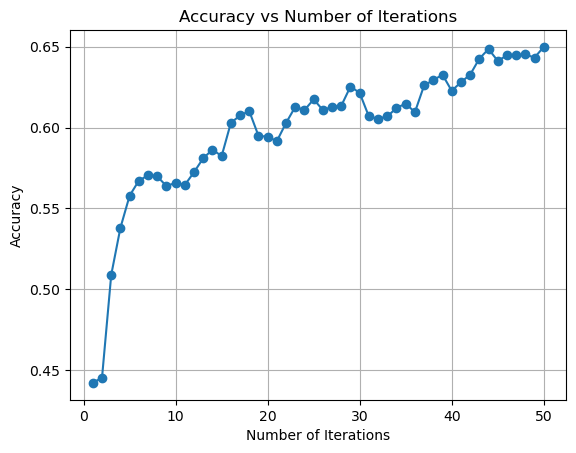

Training set size: 50, Unlabeled set size: 1000
Iteration: 10, Accuracy: 0.5625413633355394
Strategy: Random, Training set size: 150, Unlabeled set size: 900
Iteration: 20, Accuracy: 0.6373262739907346
Strategy: Random, Training set size: 250, Unlabeled set size: 800
Iteration: 30, Accuracy: 0.6512243547319656
Strategy: Random, Training set size: 350, Unlabeled set size: 700
Iteration: 40, Accuracy: 0.6664460622104567
Strategy: Random, Training set size: 450, Unlabeled set size: 600
Iteration: 50, Accuracy: 0.6823295830575777
Strategy: Random, Training set size: 550, Unlabeled set size: 500


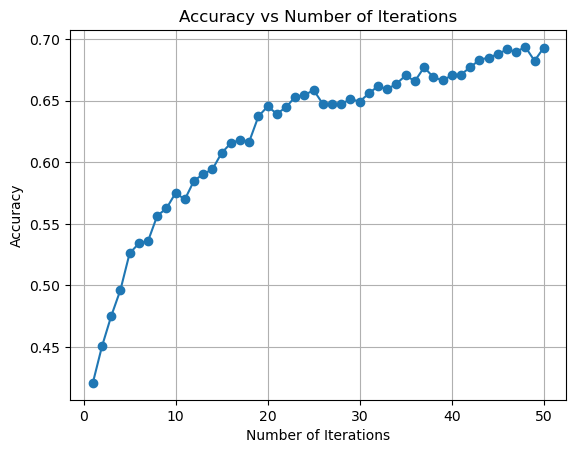

Training set size: 50, Unlabeled set size: 1000
Iteration: 10, Accuracy: 0.5671740569159497
Strategy: Random, Training set size: 150, Unlabeled set size: 900
Iteration: 20, Accuracy: 0.6048974189278623
Strategy: Random, Training set size: 250, Unlabeled set size: 800
Iteration: 30, Accuracy: 0.6399735274652548
Strategy: Random, Training set size: 350, Unlabeled set size: 700
Iteration: 40, Accuracy: 0.6565188616810059
Strategy: Random, Training set size: 450, Unlabeled set size: 600
Iteration: 50, Accuracy: 0.6730641958967571
Strategy: Random, Training set size: 550, Unlabeled set size: 500


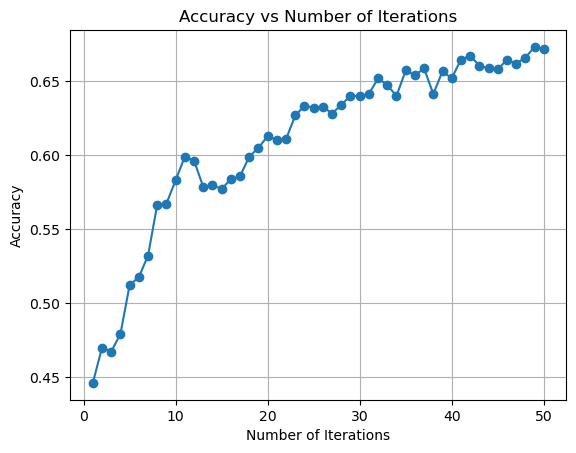

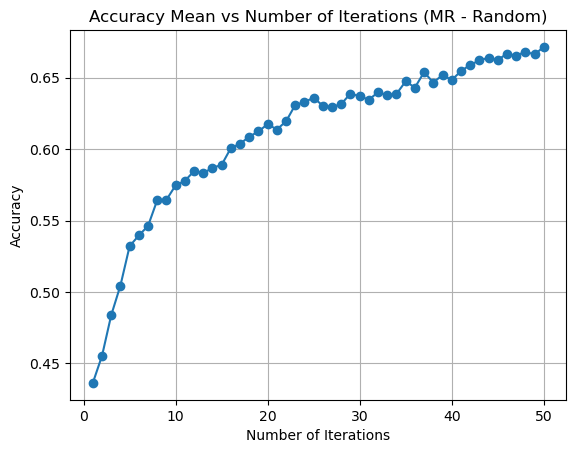

In [253]:
# Mind Reading - 1, 2, 3 Using Random
N = 50
k = 10
path1 = {
    'train': {'X': '/Users/mohit/Documents/FSU/DM/MindReading/trainingMatrix_MindReading1.mat', 'y': '/Users/mohit/Documents/FSU/DM/MindReading/trainingLabels_MindReading_1.mat'},
    'test': {'X': '/Users/mohit/Documents/FSU/DM/MindReading/testingMatrix_MindReading1.mat', 'y': '/Users/mohit/Documents/FSU/DM/MindReading/testingLabels_MindReading1.mat'},
    'unlabeled': {'X': '/Users/mohit/Documents/FSU/DM/MindReading/unlabeledMatrix_MindReading1.mat', 'y': '/Users/mohit/Documents/FSU/DM/MindReading/unlabeledLabels_MindReading_1.mat'},
}
active_model = ActiveModel(N, k, path1)
# Active Learning using Random Sampling
vector1 = active_model.active_learning(strategy='Random')
active_model.plot()

path2 = {
    'train': {'X': '/Users/mohit/Documents/FSU/DM/MindReading/trainingMatrix_MindReading2.mat', 'y': '/Users/mohit/Documents/FSU/DM/MindReading/trainingLabels_MindReading_2.mat'},
    'test': {'X': '/Users/mohit/Documents/FSU/DM/MindReading/testingMatrix_MindReading2.mat', 'y': '/Users/mohit/Documents/FSU/DM/MindReading/testingLabels_MindReading2.mat'},
    'unlabeled': {'X': '/Users/mohit/Documents/FSU/DM/MindReading/unlabeledMatrix_MindReading2.mat', 'y': '/Users/mohit/Documents/FSU/DM/MindReading/unlabeledLabels_MindReading_2.mat'},
}
active_model = ActiveModel(N, k, path2)
# Active Learning using Random Sampling
vector2 = active_model.active_learning(strategy='Random')
active_model.plot()

path3 = {
    'train': {'X': '/Users/mohit/Documents/FSU/DM/MindReading/trainingMatrix_MindReading3.mat', 'y': '/Users/mohit/Documents/FSU/DM/MindReading/trainingLabels_MindReading_3.mat'},
    'test': {'X': '/Users/mohit/Documents/FSU/DM/MindReading/testingMatrix_MindReading3.mat', 'y': '/Users/mohit/Documents/FSU/DM/MindReading/testingLabels_MindReading3.mat'},
    'unlabeled': {'X': '/Users/mohit/Documents/FSU/DM/MindReading/unlabeledMatrix_MindReading3.mat', 'y': '/Users/mohit/Documents/FSU/DM/MindReading/unlabeledLabels_MindReading_3.mat'},
}
active_model = ActiveModel(N, k, path3)
# Active Learning using Random Sampling
vector3 = active_model.active_learning(strategy='Random')
active_model.plot()

# Calculate the mean vector
mean_vector_MR_Random = np.mean([vector1, vector2, vector3], axis=0)
plt.plot(list(range(1, N + 1)), mean_vector_MR_Random, marker='o')
plt.title('Accuracy Mean vs Number of Iterations (MR - Random)')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

Training set size: 50, Unlabeled set size: 1000
Iteration: 10, Accuracy: 0.5440105890138981
Strategy: Uncertainty, Training set size: 150, Unlabeled set size: 900
Iteration: 20, Accuracy: 0.6015883520847121
Strategy: Uncertainty, Training set size: 250, Unlabeled set size: 800
Iteration: 30, Accuracy: 0.6637988087359364
Strategy: Uncertainty, Training set size: 350, Unlabeled set size: 700
Iteration: 40, Accuracy: 0.6776968894771674
Strategy: Uncertainty, Training set size: 450, Unlabeled set size: 600
Iteration: 50, Accuracy: 0.7074784910655195
Strategy: Uncertainty, Training set size: 550, Unlabeled set size: 500


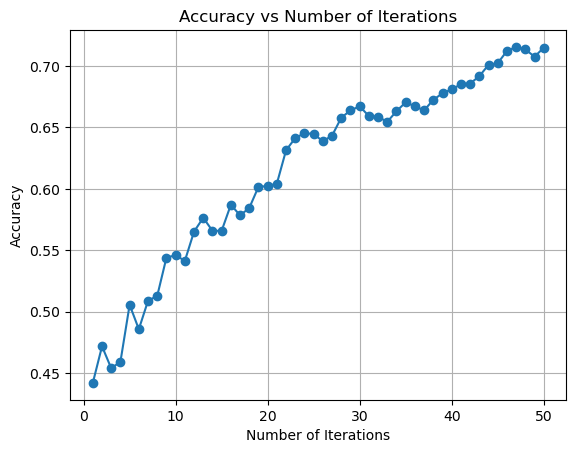

Training set size: 50, Unlabeled set size: 1000
Iteration: 10, Accuracy: 0.5241561879549967
Strategy: Uncertainty, Training set size: 150, Unlabeled set size: 900
Iteration: 20, Accuracy: 0.6154864328259431
Strategy: Uncertainty, Training set size: 250, Unlabeled set size: 800
Iteration: 30, Accuracy: 0.6611515552614163
Strategy: Uncertainty, Training set size: 350, Unlabeled set size: 700
Iteration: 40, Accuracy: 0.6829913964262078
Strategy: Uncertainty, Training set size: 450, Unlabeled set size: 600


/Users/mohit/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Iteration: 50, Accuracy: 0.7160820648577101
Strategy: Uncertainty, Training set size: 550, Unlabeled set size: 500


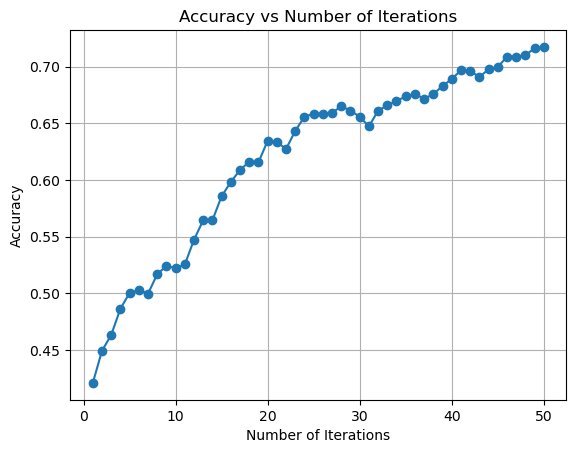

Training set size: 50, Unlabeled set size: 1000
Iteration: 10, Accuracy: 0.5440105890138981
Strategy: Uncertainty, Training set size: 150, Unlabeled set size: 900
Iteration: 20, Accuracy: 0.6015883520847121
Strategy: Uncertainty, Training set size: 250, Unlabeled set size: 800
Iteration: 30, Accuracy: 0.6637988087359364
Strategy: Uncertainty, Training set size: 350, Unlabeled set size: 700
Iteration: 40, Accuracy: 0.6776968894771674
Strategy: Uncertainty, Training set size: 450, Unlabeled set size: 600
Iteration: 50, Accuracy: 0.7074784910655195
Strategy: Uncertainty, Training set size: 550, Unlabeled set size: 500


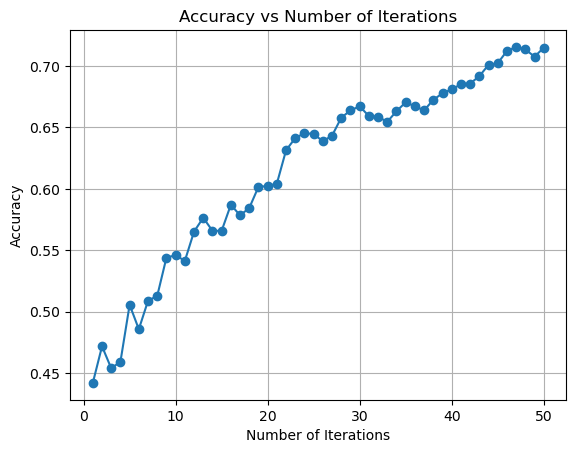

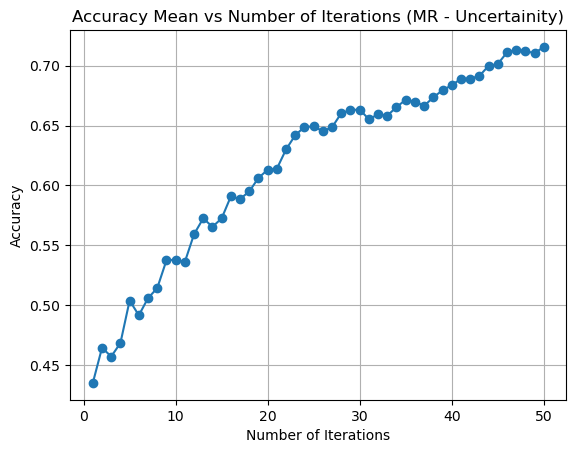

In [254]:
# Mind Reading - 1, 2, 3 Using Uncertainty
N = 50
k = 10
path1 = {
    'train': {'X': '/Users/mohit/Documents/FSU/DM/MindReading/trainingMatrix_MindReading1.mat', 'y': '/Users/mohit/Documents/FSU/DM/MindReading/trainingLabels_MindReading_1.mat'},
    'test': {'X': '/Users/mohit/Documents/FSU/DM/MindReading/testingMatrix_MindReading1.mat', 'y': '/Users/mohit/Documents/FSU/DM/MindReading/testingLabels_MindReading1.mat'},
    'unlabeled': {'X': '/Users/mohit/Documents/FSU/DM/MindReading/unlabeledMatrix_MindReading1.mat', 'y': '/Users/mohit/Documents/FSU/DM/MindReading/unlabeledLabels_MindReading_1.mat'},
}
active_model = ActiveModel(N, k, path1)
# Active Learning using Random Sampling
vector1 = active_model.active_learning(strategy='Uncertainty')
active_model.plot()


path2 = {
    'train': {'X': '/Users/mohit/Documents/FSU/DM/MindReading/trainingMatrix_MindReading2.mat', 'y': '/Users/mohit/Documents/FSU/DM/MindReading/trainingLabels_MindReading_2.mat'},
    'test': {'X': '/Users/mohit/Documents/FSU/DM/MindReading/testingMatrix_MindReading2.mat', 'y': '/Users/mohit/Documents/FSU/DM/MindReading/testingLabels_MindReading2.mat'},
    'unlabeled': {'X': '/Users/mohit/Documents/FSU/DM/MindReading/unlabeledMatrix_MindReading2.mat', 'y': '/Users/mohit/Documents/FSU/DM/MindReading/unlabeledLabels_MindReading_2.mat'},
}
active_model = ActiveModel(N, k, path2)
# Active Learning using Random Sampling
vector2 = active_model.active_learning(strategy='Uncertainty')
active_model.plot()


path3 = {
    'train': {'X': '/Users/mohit/Documents/FSU/DM/MindReading/trainingMatrix_MindReading3.mat', 'y': '/Users/mohit/Documents/FSU/DM/MindReading/trainingLabels_MindReading_3.mat'},
    'test': {'X': '/Users/mohit/Documents/FSU/DM/MindReading/testingMatrix_MindReading3.mat', 'y': '/Users/mohit/Documents/FSU/DM/MindReading/testingLabels_MindReading3.mat'},
    'unlabeled': {'X': '/Users/mohit/Documents/FSU/DM/MindReading/unlabeledMatrix_MindReading3.mat', 'y': '/Users/mohit/Documents/FSU/DM/MindReading/unlabeledLabels_MindReading_3.mat'},
}
active_model = ActiveModel(N, k, path1)
# Active Learning using Random Sampling
vector3 = active_model.active_learning(strategy='Uncertainty')
active_model.plot()

# Calculate the mean vector
mean_vector_MR_Uncertainty = np.mean([vector1, vector2, vector3], axis=0)
plt.plot(list(range(1, N + 1)), mean_vector_MR_Uncertainty, marker='o')
plt.title('Accuracy Mean vs Number of Iterations (MR - Uncertainity)')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

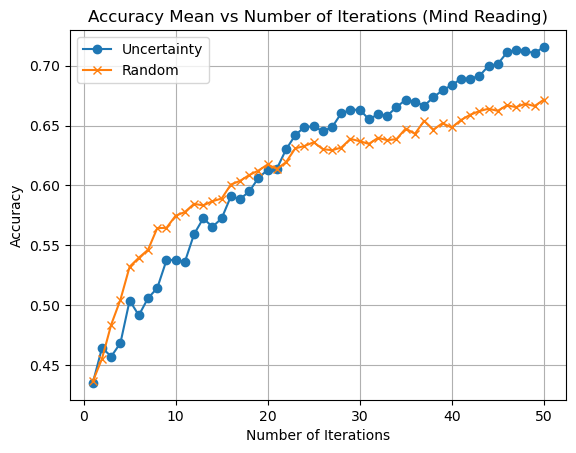

In [257]:
# Calculate the mean vector for both
plt.plot(list(range(1, N + 1)), mean_vector_MR_Uncertainty, marker='o', label = 'Uncertainty')
plt.plot(list(range(1, N + 1)), mean_vector_MR_Random, marker='x', label = 'Random')
plt.title('Accuracy Mean vs Number of Iterations (Mind Reading)')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.legend()  # Add legend with labels specified in plt.plot
plt.grid(True)
plt.show()

Training set size: 50, Unlabeled set size: 1000
Iteration: 10, Accuracy: 0.8089635854341737
Strategy: Random, Training set size: 150, Unlabeled set size: 900
Iteration: 20, Accuracy: 0.8599439775910365
Strategy: Random, Training set size: 250, Unlabeled set size: 800
Iteration: 30, Accuracy: 0.9064425770308123
Strategy: Random, Training set size: 350, Unlabeled set size: 700
Iteration: 40, Accuracy: 0.9445378151260504
Strategy: Random, Training set size: 450, Unlabeled set size: 600
Iteration: 50, Accuracy: 0.95406162464986
Strategy: Random, Training set size: 550, Unlabeled set size: 500


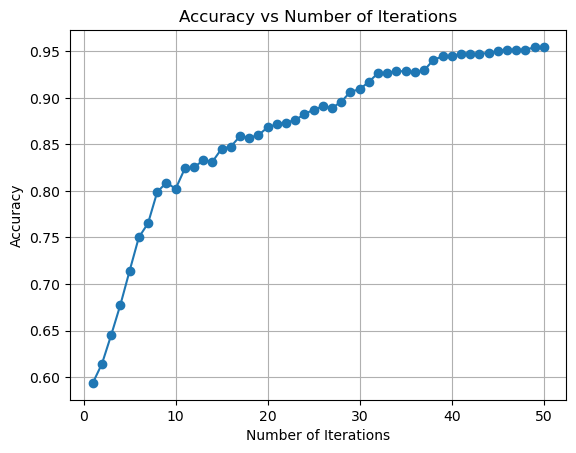

Training set size: 50, Unlabeled set size: 1000
Iteration: 10, Accuracy: 0.7983193277310925
Strategy: Random, Training set size: 150, Unlabeled set size: 900
Iteration: 20, Accuracy: 0.8638655462184874
Strategy: Random, Training set size: 250, Unlabeled set size: 800
Iteration: 30, Accuracy: 0.9327731092436975
Strategy: Random, Training set size: 350, Unlabeled set size: 700
Iteration: 40, Accuracy: 0.9445378151260504
Strategy: Random, Training set size: 450, Unlabeled set size: 600
Iteration: 50, Accuracy: 0.9529411764705882
Strategy: Random, Training set size: 550, Unlabeled set size: 500


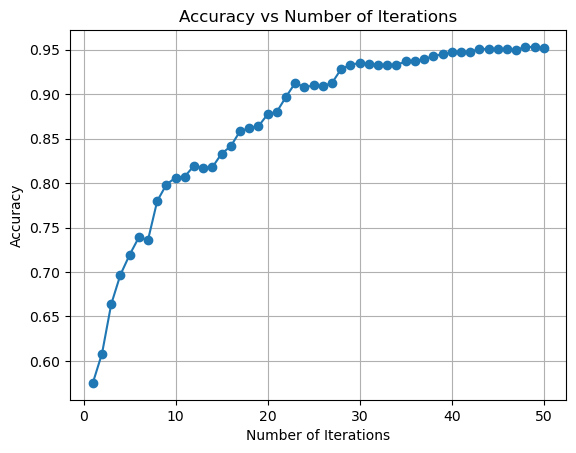

Training set size: 50, Unlabeled set size: 1000
Iteration: 10, Accuracy: 0.7563025210084033
Strategy: Random, Training set size: 150, Unlabeled set size: 900
Iteration: 20, Accuracy: 0.8750700280112045
Strategy: Random, Training set size: 250, Unlabeled set size: 800
Iteration: 30, Accuracy: 0.9086834733893557
Strategy: Random, Training set size: 350, Unlabeled set size: 700
Iteration: 40, Accuracy: 0.9361344537815126
Strategy: Random, Training set size: 450, Unlabeled set size: 600
Iteration: 50, Accuracy: 0.9478991596638655
Strategy: Random, Training set size: 550, Unlabeled set size: 500


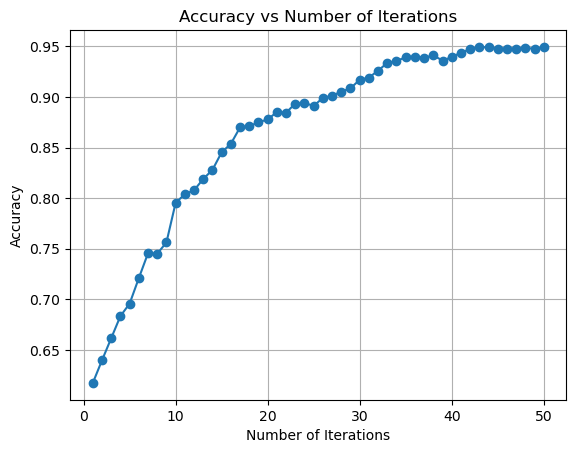

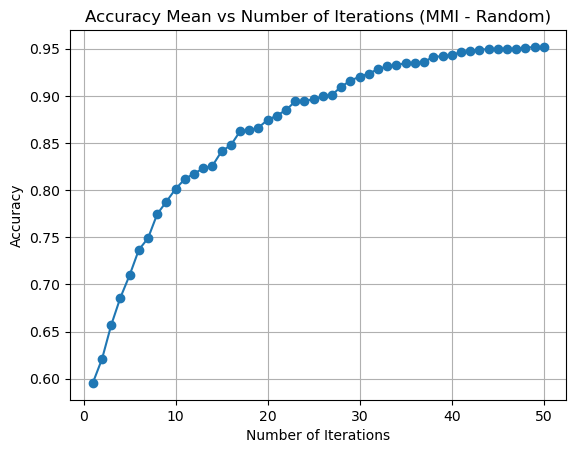

In [259]:
## MMI
# MMI - 1, 2, 3 Using Random
N = 50
k = 10
path1 = {
    'train': {'X': '/Users/mohit/Documents/FSU/DM/MMI/trainingMatrix_1.mat', 'y': '/Users/mohit/Documents/FSU/DM/MMI/trainingLabels_1.mat'},
    'test': {'X': '/Users/mohit/Documents/FSU/DM/MMI/testingMatrix_1.mat', 'y': '/Users/mohit/Documents/FSU/DM/MMI/testingLabels_1.mat'},
    'unlabeled': {'X': '/Users/mohit/Documents/FSU/DM/MMI/unlabeledMatrix_1.mat', 'y': '/Users/mohit/Documents/FSU/DM/MMI/unlabeledLabels_1.mat'},
}
active_model = ActiveModel(N, k, path1)
# Active Learning using Random Sampling
vector1 = active_model.active_learning(strategy='Random')
active_model.plot()

path2 = {
    'train': {'X': '/Users/mohit/Documents/FSU/DM/MMI/trainingMatrix_2.mat', 'y': '/Users/mohit/Documents/FSU/DM/MMI/trainingLabels_2.mat'},
    'test': {'X': '/Users/mohit/Documents/FSU/DM/MMI/testingMatrix_2.mat', 'y': '/Users/mohit/Documents/FSU/DM/MMI/testingLabels_2.mat'},
    'unlabeled': {'X': '/Users/mohit/Documents/FSU/DM/MMI/unlabeledMatrix_2.mat', 'y': '/Users/mohit/Documents/FSU/DM/MMI/unlabeledLabels_2.mat'},
}
active_model = ActiveModel(N, k, path2)
# Active Learning using Random Sampling
vector2 = active_model.active_learning(strategy='Random')
active_model.plot()

path3 = {
    'train': {'X': '/Users/mohit/Documents/FSU/DM/MMI/trainingMatrix_3.mat', 'y': '/Users/mohit/Documents/FSU/DM/MMI/trainingLabels_3.mat'},
    'test': {'X': '/Users/mohit/Documents/FSU/DM/MMI/testingMatrix_3.mat', 'y': '/Users/mohit/Documents/FSU/DM/MMI/testingLabels_3.mat'},
    'unlabeled': {'X': '/Users/mohit/Documents/FSU/DM/MMI/unlabeledMatrix_3.mat', 'y': '/Users/mohit/Documents/FSU/DM/MMI/unlabeledLabels_3.mat'},
}
active_model = ActiveModel(N, k, path3)
# Active Learning using Random Sampling
vector3 = active_model.active_learning(strategy='Random')
active_model.plot()

# Calculate the mean vector
mean_vector_MMI_Random = np.mean([vector1, vector2, vector3], axis=0)
plt.plot(list(range(1, N + 1)), mean_vector_MMI_Random, marker='o')
plt.title('Accuracy Mean vs Number of Iterations (MMI - Random)')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

Training set size: 50, Unlabeled set size: 1000
Iteration: 10, Accuracy: 0.8179271708683473
Strategy: Uncertainty, Training set size: 150, Unlabeled set size: 900
Iteration: 20, Accuracy: 0.9254901960784314
Strategy: Uncertainty, Training set size: 250, Unlabeled set size: 800
Iteration: 30, Accuracy: 0.9518207282913165
Strategy: Uncertainty, Training set size: 350, Unlabeled set size: 700
Iteration: 40, Accuracy: 0.9557422969187676
Strategy: Uncertainty, Training set size: 450, Unlabeled set size: 600
Iteration: 50, Accuracy: 0.9596638655462185
Strategy: Uncertainty, Training set size: 550, Unlabeled set size: 500


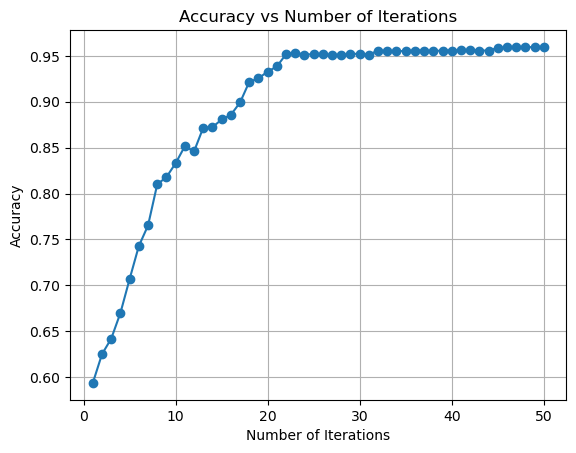

Training set size: 50, Unlabeled set size: 1000
Iteration: 10, Accuracy: 0.7792717086834734
Strategy: Uncertainty, Training set size: 150, Unlabeled set size: 900
Iteration: 20, Accuracy: 0.8969187675070028
Strategy: Uncertainty, Training set size: 250, Unlabeled set size: 800
Iteration: 30, Accuracy: 0.9316526610644258
Strategy: Uncertainty, Training set size: 350, Unlabeled set size: 700
Iteration: 40, Accuracy: 0.9439775910364145
Strategy: Uncertainty, Training set size: 450, Unlabeled set size: 600
Iteration: 50, Accuracy: 0.9484593837535014
Strategy: Uncertainty, Training set size: 550, Unlabeled set size: 500


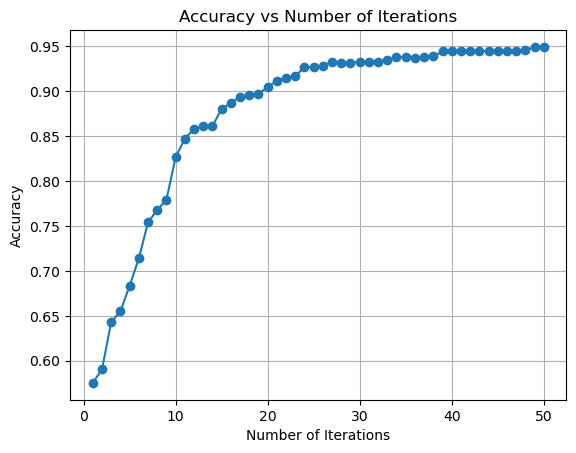

Training set size: 50, Unlabeled set size: 1000
Iteration: 10, Accuracy: 0.803921568627451
Strategy: Uncertainty, Training set size: 150, Unlabeled set size: 900
Iteration: 20, Accuracy: 0.8868347338935574
Strategy: Uncertainty, Training set size: 250, Unlabeled set size: 800
Iteration: 30, Accuracy: 0.9484593837535014
Strategy: Uncertainty, Training set size: 350, Unlabeled set size: 700
Iteration: 40, Accuracy: 0.957983193277311
Strategy: Uncertainty, Training set size: 450, Unlabeled set size: 600
Iteration: 50, Accuracy: 0.9591036414565827
Strategy: Uncertainty, Training set size: 550, Unlabeled set size: 500


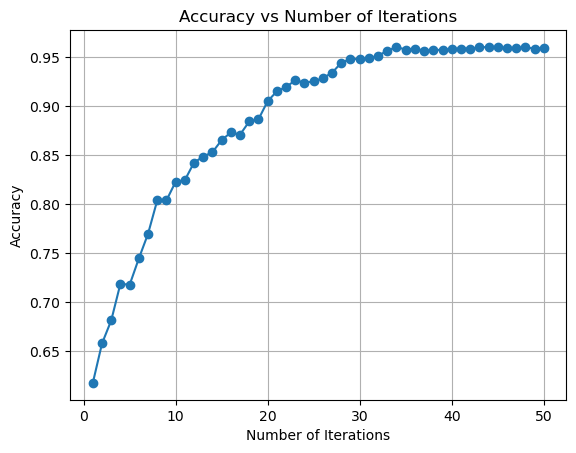

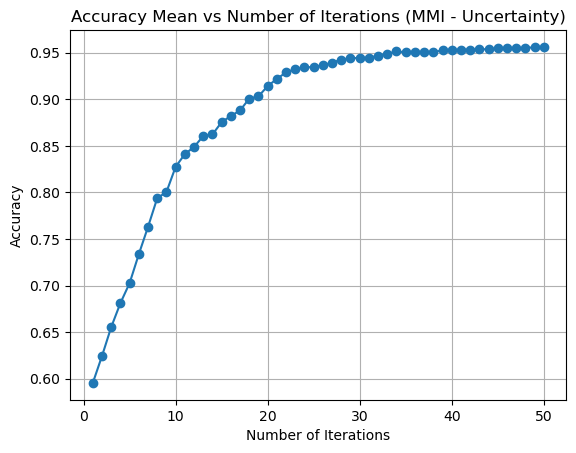

In [260]:
## MMI
# MMI - 1, 2, 3 Using Uncertainty
N = 50
k = 10
path1 = {
    'train': {'X': '/Users/mohit/Documents/FSU/DM/MMI/trainingMatrix_1.mat', 'y': '/Users/mohit/Documents/FSU/DM/MMI/trainingLabels_1.mat'},
    'test': {'X': '/Users/mohit/Documents/FSU/DM/MMI/testingMatrix_1.mat', 'y': '/Users/mohit/Documents/FSU/DM/MMI/testingLabels_1.mat'},
    'unlabeled': {'X': '/Users/mohit/Documents/FSU/DM/MMI/unlabeledMatrix_1.mat', 'y': '/Users/mohit/Documents/FSU/DM/MMI/unlabeledLabels_1.mat'},
}
active_model = ActiveModel(N, k, path1)
# Active Learning using Uncertainty Sampling
vector1 = active_model.active_learning(strategy='Uncertainty')
active_model.plot()

path2 = {
    'train': {'X': '/Users/mohit/Documents/FSU/DM/MMI/trainingMatrix_2.mat', 'y': '/Users/mohit/Documents/FSU/DM/MMI/trainingLabels_2.mat'},
    'test': {'X': '/Users/mohit/Documents/FSU/DM/MMI/testingMatrix_2.mat', 'y': '/Users/mohit/Documents/FSU/DM/MMI/testingLabels_2.mat'},
    'unlabeled': {'X': '/Users/mohit/Documents/FSU/DM/MMI/unlabeledMatrix_2.mat', 'y': '/Users/mohit/Documents/FSU/DM/MMI/unlabeledLabels_2.mat'},
}
active_model = ActiveModel(N, k, path2)
# Active Learning using Uncertainty Sampling
vector2 = active_model.active_learning(strategy='Uncertainty')
active_model.plot()

path3 = {
    'train': {'X': '/Users/mohit/Documents/FSU/DM/MMI/trainingMatrix_3.mat', 'y': '/Users/mohit/Documents/FSU/DM/MMI/trainingLabels_3.mat'},
    'test': {'X': '/Users/mohit/Documents/FSU/DM/MMI/testingMatrix_3.mat', 'y': '/Users/mohit/Documents/FSU/DM/MMI/testingLabels_3.mat'},
    'unlabeled': {'X': '/Users/mohit/Documents/FSU/DM/MMI/unlabeledMatrix_3.mat', 'y': '/Users/mohit/Documents/FSU/DM/MMI/unlabeledLabels_3.mat'},
}
active_model = ActiveModel(N, k, path3)
# Active Learning using Uncertainty Sampling
vector3 = active_model.active_learning(strategy='Uncertainty')
active_model.plot()

# Calculate the mean vector
mean_vector_MMI_Uncertainty = np.mean([vector1, vector2, vector3], axis=0)
plt.plot(list(range(1, N + 1)), mean_vector_MMI_Uncertainty, marker='o')
plt.title('Accuracy Mean vs Number of Iterations (MMI - Uncertainty)')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

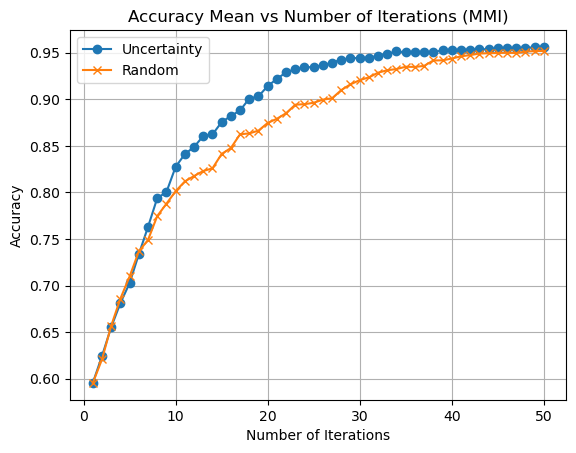

In [261]:
# Calculate the mean vector for both
plt.plot(list(range(1, N + 1)), mean_vector_MMI_Uncertainty, marker='o', label = 'Uncertainty')
plt.plot(list(range(1, N + 1)), mean_vector_MMI_Random, marker='x', label = 'Random')
plt.title('Accuracy Mean vs Number of Iterations (MMI)')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.legend()  # Add legend with labels specified in plt.plot
plt.grid(True)
plt.show()